<a href="https://colab.research.google.com/github/MehrajHossainMahi14/Machine-Learning-Projects/blob/main/Machine_learning_project%2C%20%20%20%20%20%20%20Mahi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning EDGE Project /emotion_dataset.csv')

In [ ]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
df = df.rename(columns={'Emotion': 'label', 'Text': 'sentence'})

In [ ]:
df

,Unnamed: 0,label,sentence,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
label,0
sentence,0
Clean_Text,466


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['label'].value_counts()

,count
label,
joy,11037
sadness,6719
fear,5409
anger,4286
surprise,4062
neutral,1811
disgust,856
shame,146


In [ ]:
 df.dropna(inplace=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_x= LabelEncoder()

In [ ]:
df

,Unnamed: 0,label,sentence,Clean_Text
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
5,5,fear,I'm expecting an extremely important phonecall...,Im expecting extremely important phonecall min...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [ ]:
df['label'] = le_x.fit_transform(df.label)

In [ ]:
label_mapping = dict(zip(le_x.classes_, le_x.transform(le_x.classes_)))
print(label_mapping)

{'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'shame': 6, 'surprise': 7}


In [ ]:
df

,Unnamed: 0,label,sentence,Clean_Text
1,1,3,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,5,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,3,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
5,5,2,I'm expecting an extremely important phonecall...,Im expecting extremely important phonecall min...
...,...,...,...,...
34787,34787,7,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,3,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,0,A man robbed me today .,man robbed today
34790,34790,2,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [ ]:
df['label'].value_counts()

,count
label,
3,11037
5,6719
2,5409
0,4286
7,4062
4,1811
1,856
6,146


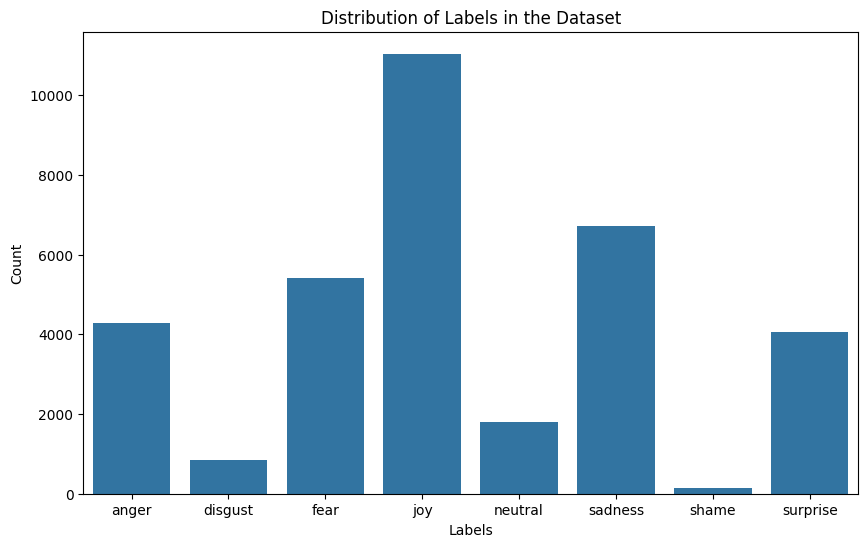

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)

plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Labels in the Dataset")

# Fix: Invert the label_mapping to map numerical labels to original labels
inverted_label_mapping = {v: k for k, v in label_mapping.items()}

# Use inverted_label_mapping for tick labels
tick_labels = [inverted_label_mapping[index] for index in label_counts.index]
plt.xticks(label_counts.index, tick_labels)
plt.show()

<ipython-input-82-5006bf3e42e5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')  # Use 'viridis' or any other palette


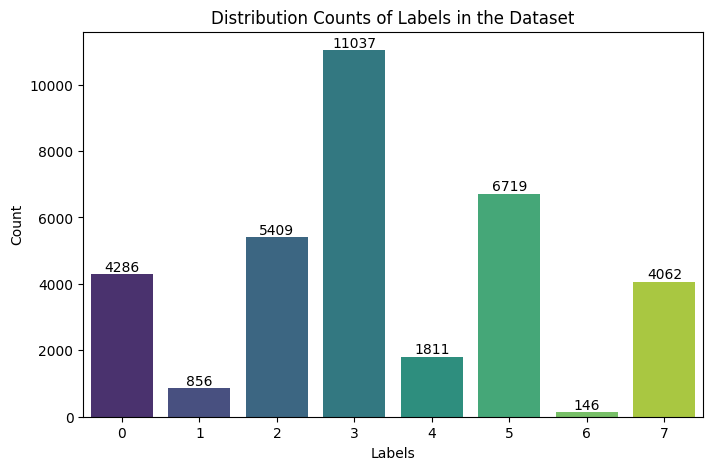

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['label'].value_counts()

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')  # Use 'viridis' or any other palette

plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution Counts of Labels in the Dataset")
inverted_label_mapping = {v: k for k, v in label_mapping.items()}
tick_labels = [inverted_label_mapping[index] for index in label_counts.index]

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

<ipython-input-83-66f49d089959>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


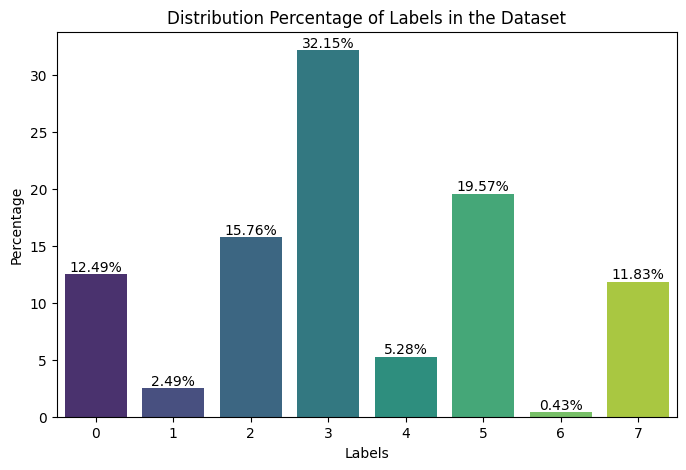

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['label'].value_counts()
total_samples = len(df)
label_percentages = (label_counts / total_samples) * 100
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=label_counts.index,
    y=label_percentages.values,
    palette='viridis'
)
for p in ax.patches:
    percentage = f'{p.get_height():.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(
        percentage,
        (x, y),
        ha='center',
        va='center',
        fontsize=10,
        color='black',
        xytext=(0, 5),
        textcoords='offset points'
    )

plt.xlabel("Labels")
plt.ylabel("Percentage")
plt.title("Distribution Percentage of Labels in the Dataset")
inverted_label_mapping = {v: k for k, v in label_mapping.items()}
tick_labels = [inverted_label_mapping[index] for index in label_counts.index]
plt.show()

In [ ]:
total_words = df['sentence'].str.split().str.len().sum()
print(f"Total number of words: {total_words}")

Total number of words: 563780


In [ ]:
all_words = ' '.join(df['sentence']).lower().split()
unique_words = set(all_words)
print(f"Number of unique words: {len(unique_words)}")

Number of unique words: 57530


In [ ]:
df['sentence'] = df['sentence'].fillna('')
all_words = ' '.join(df['sentence']).lower().split()
unique_words = set(all_words)
print("Unique words in the column:")
print(unique_words)

Unique words in the column:
{'drumhark', 'cowed', 'eto', 'moeilijk..', '@rileysteele', 'all!!!.....i', 'muffin', 'clubs.', '#mailimusic', '@theweekndxo', 'found', 'release.', 'fistpump.', 'antoine', 'breakfast!!', 'today...good', 'larger', 'wires', 'makers', '#ae', "u've", 'whys', 'greys', '@markhiggs71', 'coma.', 'real&quot;', 'dictionary', 'rideaux!', 'dalam', 'norms', 'ledger', 'journeys', 'nooooooooo!', 'anger...', '-we', 'kristen', '&quot;free', "d'attente.", 'jasmine', '#caregiver', 'tesco.', 'diminishing', '#minorheadaches', '#manipulate', 'soak.', 'guests.', 'him!', 'dacht', '75%', '@timdouwsma', 'buikpijn', 'eens', 'warriors', 'empapada.', '#youregettingfivepages', 'surfaces', 'chance,', '#bowties', '@bradfordreilly', '#weird', 'staat', 'poor', 'speeded', '99.7', 'still,', 'alors', 'unemplyment', 'close.', 'nuvvila', '(:&lt;', 'flanel', 'chilled.', 'suerte', 'bureaucracy', '#hanginout', 'thingy,', '&quot;@fyeahtourist:...fox', 'teenager', '@boiibasses', 'part,', '1:37', '#cari

In [ ]:
df['sentence'] = df['sentence'].fillna('')
all_words = ' '.join(df['sentence']).lower().split()
unique_words = set(all_words)
print(f"Number of unique words: {len(unique_words)}")


Number of unique words: 57530


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# le_x = LabelEncoder()
# df['label']=le_x.fit_transform(df.label)

# Data Preprocessing

In [ ]:
punctuation_chars = "?,।!;:"

def remove_punctuation(text):
    return ''.join(char for char in text if char not in punctuation_chars)

df['sentence'] = df['sentence'].apply(remove_punctuation)


In [ ]:
import re
df['sentence'] = df['sentence'].apply(lambda x: re.sub(r"[^\w\s]", "", x))

In [ ]:
df['sentence'] = df['sentence'].apply(lambda x: " ".join(x.split()))

In [ ]:
total_words = df['sentence'].str.split().str.len().sum()
print(f"Total number of words: {total_words}")

Total number of words: 539973


In [ ]:
all_words = ' '.join(df['sentence']).lower().split()
unique_words = set(all_words)
print(f"Number of unique words: {len(unique_words)}")

Number of unique words: 40873


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
label,0
sentence,0
Clean_Text,0


# ML Models using count -Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # import CountVectorizer from sklearn.feature_extraction.text

In [ ]:
vectorizer = CountVectorizer(max_features=5000)  # Adjust max_features as needed
X1 = vectorizer.fit_transform(df['sentence'])
y1 = df['label']

X1 = X1.astype(np.float64)


## **Random Forest Model - 60%**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [ ]:
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.45      0.56       842
           1       0.90      0.05      0.10       164
           2       0.84      0.62      0.71      1096
           3       0.52      0.88      0.65      2177
           4       0.56      0.66      0.60       389
           5       0.62      0.48      0.54      1347
           6       0.95      0.62      0.75        32
           7       0.76      0.26      0.39       819

    accuracy                           0.60      6866
   macro avg       0.73      0.50      0.54      6866
weighted avg       0.66      0.60      0.58      6866



## LightGBM Model -62%

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=1)
lgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.344129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5159
[LightGBM] [Info] Number of data points in the train set: 27460, number of used features: 1884
[LightGBM] [Info] Start training from score -2.076097
[LightGBM] [Info] Start training from score -3.680900
[LightGBM] [Info] Start training from score -1.851097
[LightGBM] [Info] Start training from score -1.131184
[LightGBM] [Info] Start training from score -2.960666
[LightGBM] [Info] Start training from score -1.631530
[LightGBM] [Info] Start training from score -5.484287
[LightGBM] [Info] Start training from score -2.136232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(random_state=1)

In [ ]:
y_pred = lgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.6172443926594815
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.51      0.57       842
           1       0.54      0.21      0.31       164
           2       0.78      0.59      0.67      1096
           3       0.58      0.83      0.68      2177
           4       0.60      0.62      0.61       389
           5       0.60      0.55      0.57      1347
           6       0.88      0.94      0.91        32
           7       0.61      0.37      0.46       819

    accuracy                           0.62      6866
   macro avg       0.66      0.58      0.60      6866
weighted avg       0.63      0.62      0.61      6866



## LogisticRegression - 63%

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr_model = LogisticRegression(random_state=1)
lgr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
y_pred = lgr_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6294785901543839
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.56      0.59       842
           1       0.45      0.29      0.35       164
           2       0.73      0.64      0.69      1096
           3       0.64      0.77      0.70      2177
           4       0.63      0.65      0.64       389
           5       0.59      0.57      0.58      1347
           6       0.93      0.84      0.89        32
           7       0.56      0.44      0.49       819

    accuracy                           0.63      6866
   macro avg       0.64      0.60      0.62      6866
weighted avg       0.63      0.63      0.62      6866



# **SMOTE Sampling Apply**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X1,y1)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=1)

## Random Forest -86%

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [ ]:
y_pred = rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      2146
           1       0.99      0.98      0.98      2196
           2       0.95      0.82      0.88      2200
           3       0.57      0.86      0.68      2187
           4       0.87      0.97      0.92      2262
           5       0.83      0.67      0.74      2269
           6       1.00      1.00      1.00      2153
           7       0.96      0.78      0.86      2247

    accuracy                           0.86     17660
   macro avg       0.88      0.86      0.87     17660
weighted avg       0.88      0.86      0.87     17660



## LightGBM Model -81%

In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=1)
lgb_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.036845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142565
[LightGBM] [Info] Number of data points in the train set: 70636, number of used features: 3662
[LightGBM] [Info] Start training from score -2.072500
[LightGBM] [Info] Start training from score -2.078140
[LightGBM] [Info] Start training from score -2.078592
[LightGBM] [Info] Start training from score -2.077122
[LightGBM] [Info] Start training from score -2.085633
[LightGBM] [Info] Start training from score -2.086431
[LightGBM] [Info] Start training from score -2.073288
[LightGBM] [Info] Start training from score -2.083925


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(random_state=1)

In [ ]:
y_pred = lgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Accuracy: 0.8133635334088335
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78      2146
           1       0.95      0.95      0.95      2196
           2       0.85      0.74      0.79      2200
           3       0.61      0.78      0.68      2187
           4       0.80      0.92      0.86      2262
           5       0.70      0.63      0.66      2269
           6       1.00      1.00      1.00      2153
           7       0.84      0.74      0.79      2247

    accuracy                           0.81     17660
   macro avg       0.82      0.81      0.81     17660
weighted avg       0.82      0.81      0.81     17660



## LogisticRegression - 81%

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr_model = LogisticRegression(random_state=1)
lgr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [ ]:
y_pred = lgr_model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8120611551528879
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      2146
           1       0.89      0.97      0.93      2196
           2       0.82      0.78      0.80      2200
           3       0.68      0.62      0.65      2187
           4       0.80      0.93      0.86      2262
           5       0.72      0.64      0.68      2269
           6       1.00      1.00      1.00      2153
           7       0.78      0.77      0.77      2247

    accuracy                           0.81     17660
   macro avg       0.81      0.81      0.81     17660
weighted avg       0.81      0.81      0.81     17660

